In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [2]:
import os

class_names = sorted(os.listdir("./dogs/images"))

In [ ]:
for breed in class_names:
    os.mkdir('./dogs/data/' + breed)

In [75]:
for breed in class_names:
    for file in os.listdir('./dogs/images/{}'.format(breed)):
        img = Image.open('./dogs/images/{}/{}'.format(breed, file))
        img = img.convert('RGB')
        img = img.resize((299, 299))
        img.save('./dogs/data/' + breed + '/' + file )

In [86]:
def paths():
    paths = list()
    for breed in class_names:
        base_name = "./dogs/data/{}/".format(breed)
        for img_name in os.listdir(base_name):
            paths.append(base_name + img_name)
    return paths

paths = paths()

In [90]:
train_paths, val_test_paths= train_test_split(paths, test_size=0.2, random_state=1029)
val_paths, test_paths = train_test_split(val_test_paths, test_size=0.5, random_state=1029)

In [134]:
#dataset
def train_val_test_dataset(name, paths):
    os.mkdir('./dogs/' + name)
    for breed in class_names:
        os.mkdir('./dogs/'+ name + '/' + breed)
        
    for i in range(len(paths)):
        for breed in class_names:
             if (paths[i].split('/')[3] == breed):
                img = Image.open(paths[i])
                img.save('./dogs/'+ name + '/'+ breed + '/' + paths[i].split('/')[4] )


In [ ]:
train_val_test_dataset('train', train_paths)

In [136]:
train_val_test_dataset('val', val_paths)

In [137]:
train_val_test_dataset('test', test_paths)

In [264]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds =  train_gen.flow_from_directory(
            './dogs/train',
            target_size=(298, 298),
            batch_size=128
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds =  val_gen.flow_from_directory(
         './dogs/val',
          target_size=(298, 298),
          batch_size=128,
          shuffle=False
)

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './dogs/test',
    target_size=(298, 298),
    batch_size=128,
    shuffle=False
)

Found 16464 images belonging to 120 classes.
Found 2058 images belonging to 120 classes.
Found 2058 images belonging to 120 classes.


In [265]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(298, 298, 3)
    )
    base_model.trainable = False

    ###########################################
    
    inputs = keras.Input(shape=(298, 298, 3))
    
    base = base_model(inputs, training=False)
    
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(120)(inner)
    
    model = keras.Model(inputs, outputs)

    ###########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [266]:
scores = {}

for lr in [ 0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.0001
Epoch 1/10


ResourceExhaustedError: Graph execution error:

Detected at node 'model_60/xception/block1_conv1_bn/FusedBatchNormV3' defined at (most recent call last):
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\traitlets\config\application.py", line 1053, in launch_instance
      app.start()
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 737, in start
      self.io_loop.start()
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 524, in dispatch_queue
      await self.process_one()
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 513, in process_one
      await dispatch(*args)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 418, in dispatch_shell
      await result
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 758, in execute_request
      reply_content = await reply_content
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 426, in do_execute
      res = shell.run_cell(
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3046, in run_cell
      result = self._run_cell(
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3101, in _run_cell
      result = runner(coro)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3306, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3488, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3548, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Phyo Min Khant\AppData\Local\Temp\ipykernel_42776\1068155465.py", line 7, in <module>
      history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 850, in call
      outputs = self._fused_batch_norm(inputs, training=training)
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 660, in _fused_batch_norm
      output, mean, variance = control_flow_util.smart_cond(
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\utils\control_flow_util.py", line 108, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "C:\Users\Phyo Min Khant\anaconda3\Anaconda3\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 649, in _fused_batch_norm_inference
      return tf.compat.v1.nn.fused_batch_norm(
Node: 'model_60/xception/block1_conv1_bn/FusedBatchNormV3'
OOM when allocating tensor with shape[128,148,148,32] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_60/xception/block1_conv1_bn/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_817430]

In [233]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds =  train_gen.flow_from_directory(
            './dogs/train',
            target_size=(150, 150),
            batch_size=64
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds =  val_gen.flow_from_directory(
         './dogs/val',
          target_size=(150, 150),
          batch_size=64,
          shuffle=False
)

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './dogs/test',
    target_size=(299, 299),
    batch_size=64,
    shuffle=False
)

Found 16464 images belonging to 120 classes.
Found 2058 images belonging to 120 classes.
Found 2058 images belonging to 120 classes.


In [234]:
scores = {}

for lr in [ 0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.0001
Epoch 1/10
 70/258 [=======>......................] - ETA: 38s - loss: 4.7304 - accuracy: 0.0366

KeyboardInterrupt: 

In [175]:
learning_rate = 0.0001

scores = {}

for size in [ 1000, 3000, 100]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print()
    print()

1000
Epoch 1/10
258/258 [==============================] - 54s 191ms/step - loss: 2.1142 - accuracy: 0.5299 - val_loss: 1.3639 - val_accuracy: 0.6399
Epoch 2/10
258/258 [==============================] - 47s 182ms/step - loss: 1.1333 - accuracy: 0.6829 - val_loss: 1.3009 - val_accuracy: 0.6540
Epoch 3/10
258/258 [==============================] - 58s 226ms/step - loss: 0.9666 - accuracy: 0.7274 - val_loss: 1.2975 - val_accuracy: 0.6521
Epoch 4/10
258/258 [==============================] - 60s 233ms/step - loss: 0.8431 - accuracy: 0.7594 - val_loss: 1.3006 - val_accuracy: 0.6584
Epoch 5/10
258/258 [==============================] - 49s 188ms/step - loss: 0.7427 - accuracy: 0.7885 - val_loss: 1.2912 - val_accuracy: 0.6652
Epoch 6/10
258/258 [==============================] - 56s 215ms/step - loss: 0.6567 - accuracy: 0.8175 - val_loss: 1.2997 - val_accuracy: 0.6623
Epoch 7/10
258/258 [==============================] - 264s 1s/step - loss: 0.5812 - accuracy: 0.8414 - val_loss: 1.3029 - val

KeyboardInterrupt: 

In [3]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.2):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False

    ###########################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    
    base = base_model(inputs, training=False)
    
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(120)(drop)
    
    model = keras.Model(inputs, outputs)

    ###########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [236]:
learning_rate = 0.0001
size = 1000
scores = {}

for droprate in [0.0, 0.2, 0.5]:
    print(droprate)

    model = make_model(learning_rate=learning_rate, size_inner=size, droprate=droprate)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[droprate] = history.history
    
    print()
    print()

0.0
Epoch 1/10
 95/258 [==========>...................] - ETA: 33s - loss: 3.2356 - accuracy: 0.3673

KeyboardInterrupt: 

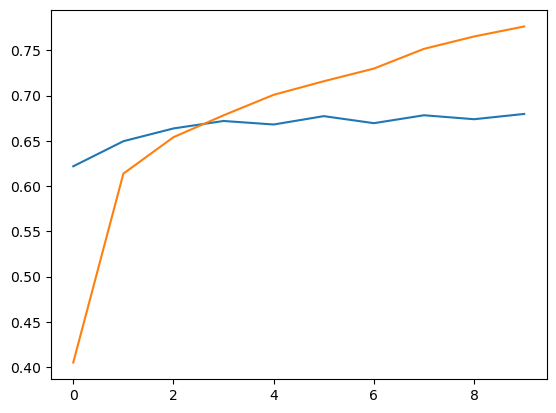

In [185]:
hist = scores[0.5]
plt.plot(hist['val_accuracy'], label=('val=%s' %droprate))
plt.plot(hist['accuracy'], label=('val=%s' %droprate))

In [4]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(120)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [460]:
input_size=150

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    width_shift_range=5.0,
    height_shift_range=5.0,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0,2]
)

train_ds = train_gen.flow_from_directory(
    './dogs/train',
    target_size=(input_size, input_size),
    batch_size=64
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './dogs/val',
    target_size=(input_size, input_size),
    batch_size=64,
    shuffle=False
)

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './dogs/test',
    target_size=(input_size, input_size),
    batch_size=64,
    shuffle=False
)

Found 16464 images belonging to 120 classes.
Found 2058 images belonging to 120 classes.
Found 2058 images belonging to 120 classes.


In [461]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v6_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [430]:
input_size=150
learning_rate = 0.0001
size = 1000
droprate=0.5

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=30, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/30
258/258 [==============================] - 251s 917ms/step - loss: 3.1101 - accuracy: 0.3227 - val_loss: 1.4917 - val_accuracy: 0.6273
Epoch 2/30
258/258 [==============================] - 212s 821ms/step - loss: 1.9315 - accuracy: 0.5146 - val_loss: 1.3225 - val_accuracy: 0.6497
Epoch 3/30
258/258 [==============================] - 216s 838ms/step - loss: 1.7436 - accuracy: 0.5531 - val_loss: 1.2638 - val_accuracy: 0.6642
Epoch 4/30
258/258 [==============================] - 217s 840ms/step - loss: 1.6635 - accuracy: 0.5675 - val_loss: 1.2452 - val_accuracy: 0.6657
Epoch 5/30
258/258 [==============================] - 213s 825ms/step - loss: 1.6084 - accuracy: 0.5780 - val_loss: 1.2343 - val_accuracy: 0.6764
Epoch 6/30
258/258 [==============================] - 252s 977ms/step - loss: 1.5439 - accuracy: 0.5948 - val_loss: 1.2456 - val_accuracy: 0.6720
Epoch 7/30
258/258 [==============================] - 262s 1s/step - loss: 1.5114 - accuracy: 0.6010 - val_loss: 1.2283 - va

In [5]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './dogs/test',
    target_size=(150, 150),
    batch_size=64,
    shuffle=False
)

Found 2058 images belonging to 120 classes.


In [8]:
model = keras.models.load_model('xception_v4_1_23_0.683.h5')

In [9]:
model.evaluate(test_ds)

33/33 [==============================] - 8s 184ms/step - loss: 1.2009 - accuracy: 0.6754


[1.2009481191635132, 0.6754130125045776]

In [6]:
model = keras.models.load_model('xception_v6_1_19_0.684.h5')

In [7]:
model.evaluate(test_ds)

33/33 [==============================] - 17s 184ms/step - loss: 1.2037 - accuracy: 0.6672


[1.2036526203155518, 0.6671525835990906]

In [10]:
path = './dogs/test/n02086240-Shih-Tzu/n02086240_6911.jpg'
img = load_img(path, target_size=(150, 150))

x = np.array(img)
X = np.array([x])
X.shape

X = preprocess_input(X)
pred = model.predict(X)

1/1 [==============================] - 2s 2s/step


In [11]:
result = list(zip(class_names, pred[0]))
for i in range(len(result)):
    if (result[i][1] >= 1):
        print(result[i])

('n02086240-Shih-Tzu', 8.04736)
('n02094433-Yorkshire_terrier', 1.0972337)
('n02095889-Sealyham_terrier', 2.0996914)
('n02096437-Dandie_Dinmont', 5.4684544)
('n02097047-miniature_schnauzer', 1.0408137)
('n02097474-Tibetan_terrier', 1.0297703)
('n02098413-Lhasa', 5.1514354)
